In [1]:
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import seaborn as sns
from IPython.display import Image
import pydotplus
import pandas as pd
import numpy as np
import os
from sklearn.tree import export_graphviz

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 1. 데이터 소개 및 Excel Import

In [2]:
iftToVIData = pd.read_csv(
            "Enter your dataset path",
            thousands = ',',
            encoding = 'euc-kr')

iftToVI = pd.DataFrame(iftToVIData)
iftToVI

,lineCode,processCode,barcode,inspDate,inspTime,iftResult,irResMeasure,irResult,hipotVoltage,hipotResult,visionResult,visionLocation,visionMeasure,visionLocationResult,lvdtResult,lvdtLocation,lvdtLocationMeasure
0,B1,IFT,MFR01089AB;2103035198V,2021-12-07,20:07:55,F,"0.502[kV], 45640000000[Ω]",P,"3.345[kV], 0[mA]",P,NG,1_1_Ball1,0.00,NG,OK,1,1.67
1,B1,IFT,MFR01089AB;2103231379V,2021-12-07,20:08:26,F,"0.502[kV], 47060000000[Ω]",P,"3.345[kV], 0[mA]",P,NG,1_1_Ball2,0.00,NG,OK,2,1.74
2,B1,IFT,MFR01089AB;2112071915V,2021-12-07,10:02:18,F,"0.502[kV], 51050000000[Ω]",P,"3.345[kV], 0[mA]",P,NG,1_1_Ball3,4.42,NG,OK,3,1.63
3,B1,IFT,MFR01089AB;2112073877V,2021-12-07,17:39:54,F,"0.5[kV], 50850000000[Ω]",P,"3.351[kV], 0[mA]",P,NG,1_1_Ball4,0.00,NG,OK,4,1.21
4,B1,IFT,MFR01089AB;2112074320V,2021-12-07,19:30:37,F,"0.502[kV], 49380000000[Ω]",P,"3.351[kV], 0[mA]",P,NG,1_1_Ball5,0.00,NG,OK,5,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,B2,IFT,MFR01089AB;2112143769V,2021-12-14,15:58:40,P,"0.502[kV], 40700000000[Ω]",P,"3.353[kV], 0[mA]",P,NG,2_1_Item1_area,3366.00,NG,OK,16,0.69
99996,B1,IFT,MFR01089AB;2112173137V,2021-12-17,14:48:28,P,"0.5[kV], 38960000000[Ω]",P,"3.356[kV], 0[mA]",P,NG,2_1_Item2-2,4.84,NG,OK,17,0.67
99997,B3,IFT,MFR01089AB;2112111990V,2021-12-11,10:07:27,P,"0.502[kV], 35440000000[Ω]",P,"3.351[kV], 0[mA]",P,NG,2_1_Item2,4.48,NG,OK,18,0.64
99998,B2,IFT,MFR01089AB;2112143774V,2021-12-14,15:59:09,P,"0.5[kV], 39470000000[Ω]",P,"3.356[kV], 0[mA]",P,NG,2_1_Item2_area,1494.00,NG,OK,19,1.80


In [3]:
lwData = pd.read_csv(
            "S:\DB_Excel\laserwelding_result.csv",
            thousands = ',',
            encoding = 'euc-kr')

lw = pd.DataFrame(lwData)
lw

,lw_01_result,lw_02_result,lw_03_result,lw_04_result,lw_05_result,lw_06_result,lw_07_result,lw_08_result,lw_09_result,lw_10_result
0,1053.39,1052.91,1055.12,1051.11,1054.91,1051.32,1055.32,1051.73,1054.98,1052.91
1,1054.91,1052.84,1056.02,1052.22,1055.74,1053.25,1055.46,1051.73,1055.74,1053.18
2,1054.57,1052.63,1055.74,1051.87,1055.39,1052.91,1055.60,1052.08,1055.88,1053.46
3,1054.01,1053.11,1055.32,1051.59,1055.32,1051.94,1055.26,1051.32,1055.74,1053.87
4,948.99,948.72,948.86,948.86,949.13,948.86,948.72,948.65,948.79,949.13
...,...,...,...,...,...,...,...,...,...,...
99995,1077.72,1081.98,1078.92,1082.26,1078.92,1082.35,1078.37,1082.26,1080.22,1083.46
99996,1077.91,1081.98,1078.65,1082.26,1079.48,1082.44,1078.18,1082.07,1080.03,1083.46
99997,948.51,948.79,948.72,948.37,948.79,948.58,948.65,948.37,948.24,949.20
99998,948.24,949.20,948.72,948.65,948.30,949.06,948.10,948.65,948.72,948.99


In [4]:
df = pd.concat([iftToVI,lw], axis=1)
df

,lineCode,processCode,barcode,inspDate,inspTime,iftResult,irResMeasure,irResult,hipotVoltage,hipotResult,...,lw_01_result,lw_02_result,lw_03_result,lw_04_result,lw_05_result,lw_06_result,lw_07_result,lw_08_result,lw_09_result,lw_10_result
0,B1,IFT,MFR01089AB;2103035198V,2021-12-07,20:07:55,F,"0.502[kV], 45640000000[Ω]",P,"3.345[kV], 0[mA]",P,...,1053.39,1052.91,1055.12,1051.11,1054.91,1051.32,1055.32,1051.73,1054.98,1052.91
1,B1,IFT,MFR01089AB;2103231379V,2021-12-07,20:08:26,F,"0.502[kV], 47060000000[Ω]",P,"3.345[kV], 0[mA]",P,...,1054.91,1052.84,1056.02,1052.22,1055.74,1053.25,1055.46,1051.73,1055.74,1053.18
2,B1,IFT,MFR01089AB;2112071915V,2021-12-07,10:02:18,F,"0.502[kV], 51050000000[Ω]",P,"3.345[kV], 0[mA]",P,...,1054.57,1052.63,1055.74,1051.87,1055.39,1052.91,1055.60,1052.08,1055.88,1053.46
3,B1,IFT,MFR01089AB;2112073877V,2021-12-07,17:39:54,F,"0.5[kV], 50850000000[Ω]",P,"3.351[kV], 0[mA]",P,...,1054.01,1053.11,1055.32,1051.59,1055.32,1051.94,1055.26,1051.32,1055.74,1053.87
4,B1,IFT,MFR01089AB;2112074320V,2021-12-07,19:30:37,F,"0.502[kV], 49380000000[Ω]",P,"3.351[kV], 0[mA]",P,...,948.99,948.72,948.86,948.86,949.13,948.86,948.72,948.65,948.79,949.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,B2,IFT,MFR01089AB;2112143769V,2021-12-14,15:58:40,P,"0.502[kV], 40700000000[Ω]",P,"3.353[kV], 0[mA]",P,...,1077.72,1081.98,1078.92,1082.26,1078.92,1082.35,1078.37,1082.26,1080.22,1083.46
99996,B1,IFT,MFR01089AB;2112173137V,2021-12-17,14:48:28,P,"0.5[kV], 38960000000[Ω]",P,"3.356[kV], 0[mA]",P,...,1077.91,1081.98,1078.65,1082.26,1079.48,1082.44,1078.18,1082.07,1080.03,1083.46
99997,B3,IFT,MFR01089AB;2112111990V,2021-12-11,10:07:27,P,"0.502[kV], 35440000000[Ω]",P,"3.351[kV], 0[mA]",P,...,948.51,948.79,948.72,948.37,948.79,948.58,948.65,948.37,948.24,949.20
99998,B2,IFT,MFR01089AB;2112143774V,2021-12-14,15:59:09,P,"0.5[kV], 39470000000[Ω]",P,"3.356[kV], 0[mA]",P,...,948.24,949.20,948.72,948.65,948.30,949.06,948.10,948.65,948.72,948.99


# 2. 데이터 구조 파악

### 2-1. 사분위수 및 표준편차, max, min 파악

In [5]:
df.describe()

,visionMeasure,lvdtLocation,lvdtLocationMeasure,lw_01_result,lw_02_result,lw_03_result,lw_04_result,lw_05_result,lw_06_result,lw_07_result,lw_08_result,lw_09_result,lw_10_result
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,230.947225,10.50000,1.195925,1021.779287,1022.204469,1022.396254,1022.236344,1022.364064,1022.570519,1022.219454,1022.119801,1022.925867,1023.096080
std,863.351223,5.76631,0.615384,57.505868,58.239183,58.031742,58.306043,57.970362,58.332301,57.978357,58.265215,58.292383,58.661315
min,-86.730000,1.00000,0.100000,947.610000,947.610000,947.200000,947.550000,947.200000,947.750000,947.130000,947.610000,947.550000,947.680000
25%,4.120000,5.75000,0.600000,949.550000,949.550000,949.550000,949.690000,949.620000,949.820000,949.340000,949.620000,949.820000,950.170000
50%,4.810000,10.50000,1.535000,1055.810000,1053.810000,1056.710000,1053.110000,1056.290000,1053.940000,1056.710000,1052.910000,1056.430000,1053.740000
75%,5.420000,15.25000,1.760000,1077.350000,1081.420000,1078.370000,1082.070000,1078.830000,1082.070000,1078.180000,1081.980000,1079.760000,1082.900000
max,51540.000000,20.00000,5.400000,1082.440000,1088.830000,1083.550000,1089.290000,1084.660000,1087.340000,1081.790000,1086.600000,1084.480000,1088.180000


### 2-2. 데이터 컬럼 파악

In [6]:
df.columns

Index(['lineCode', 'processCode', 'barcode', 'inspDate', 'inspTime',
       'iftResult', 'irResMeasure', 'irResult', 'hipotVoltage', 'hipotResult',
       'visionResult', 'visionLocation', 'visionMeasure',
       'visionLocationResult', 'lvdtResult', 'lvdtLocation',
       'lvdtLocationMeasure', 'lw_01_result', 'lw_02_result', 'lw_03_result',
       'lw_04_result', 'lw_05_result', 'lw_06_result', 'lw_07_result',
       'lw_08_result', 'lw_09_result', 'lw_10_result'],
      dtype='object')

### 2-3. 데이터 타입 및 수량 파악

In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   lineCode              100000 non-null  object 
 1   processCode           100000 non-null  object 
 2   barcode               100000 non-null  object 
 3   inspDate              100000 non-null  object 
 4   inspTime              100000 non-null  object 
 5   iftResult             100000 non-null  object 
 6   irResMeasure          100000 non-null  object 
 7   irResult              100000 non-null  object 
 8   hipotVoltage          100000 non-null  object 
 9   hipotResult           100000 non-null  object 
 10  visionResult          100000 non-null  object 
 11  visionLocation        100000 non-null  object 
 12  visionMeasure         100000 non-null  float64
 13  visionLocationResult  100000 non-null  object 
 14  lvdtResult            100000 non-null  object 
 15  l

(100000, 27)

### 2-4. 종속변수 비율 파악

In [8]:
dfResult = df.groupby('iftResult').lineCode.count()
dfResult

iftResult
F      888
P    99112
Name: lineCode, dtype: int64

##### 양품과 불량품의 비율이 12배 가량 차이 -> 후에 모델링에서 비율 조정 필요

# 3. 데이터 전처리

### 3-1. irResMeasure컬럼 분리 및 hipotVoltage 컬럼 분리

In [9]:
tempArray = df['irResMeasure'].str.split(',').str[0]

for i in range(len(tempArray)) :
    tempArray[i] = float(tempArray[i].replace('[kV]', '').rstrip())

tempArray2 = df['irResMeasure'].str.split(',').str[1]

for i in range(len(tempArray2)) :
    tempArray2[i] = float(tempArray2[i].replace('[Ω]', '').lstrip())
    
tempArray3 = df['hipotVoltage'].str.split(',').str[0]

for i in range(len(tempArray3)) :
    tempArray3[i] = float(tempArray3[i].replace('[kV]', '').rstrip())
    
tempArray4 = df['hipotVoltage'].str.split(',').str[1]

for i in range(len(tempArray4)) :
    tempArray4[i] = float(tempArray4[i].replace('[mA]', '').lstrip())

df['irVolt'] = tempArray
df['irMeasure'] = tempArray2
df['hipotKv'] = tempArray3
df['hipotMa'] = tempArray4

df

,lineCode,processCode,barcode,inspDate,inspTime,iftResult,irResMeasure,irResult,hipotVoltage,hipotResult,...,lw_05_result,lw_06_result,lw_07_result,lw_08_result,lw_09_result,lw_10_result,irVolt,irMeasure,hipotKv,hipotMa
0,B1,IFT,MFR01089AB;2103035198V,2021-12-07,20:07:55,F,"0.502[kV], 45640000000[Ω]",P,"3.345[kV], 0[mA]",P,...,1054.91,1051.32,1055.32,1051.73,1054.98,1052.91,0.502,45640000000.0,3.345,0.0
1,B1,IFT,MFR01089AB;2103231379V,2021-12-07,20:08:26,F,"0.502[kV], 47060000000[Ω]",P,"3.345[kV], 0[mA]",P,...,1055.74,1053.25,1055.46,1051.73,1055.74,1053.18,0.502,47060000000.0,3.345,0.0
2,B1,IFT,MFR01089AB;2112071915V,2021-12-07,10:02:18,F,"0.502[kV], 51050000000[Ω]",P,"3.345[kV], 0[mA]",P,...,1055.39,1052.91,1055.60,1052.08,1055.88,1053.46,0.502,51050000000.0,3.345,0.0
3,B1,IFT,MFR01089AB;2112073877V,2021-12-07,17:39:54,F,"0.5[kV], 50850000000[Ω]",P,"3.351[kV], 0[mA]",P,...,1055.32,1051.94,1055.26,1051.32,1055.74,1053.87,0.5,50850000000.0,3.351,0.0
4,B1,IFT,MFR01089AB;2112074320V,2021-12-07,19:30:37,F,"0.502[kV], 49380000000[Ω]",P,"3.351[kV], 0[mA]",P,...,949.13,948.86,948.72,948.65,948.79,949.13,0.502,49380000000.0,3.351,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,B2,IFT,MFR01089AB;2112143769V,2021-12-14,15:58:40,P,"0.502[kV], 40700000000[Ω]",P,"3.353[kV], 0[mA]",P,...,1078.92,1082.35,1078.37,1082.26,1080.22,1083.46,0.502,40700000000.0,3.353,0.0
99996,B1,IFT,MFR01089AB;2112173137V,2021-12-17,14:48:28,P,"0.5[kV], 38960000000[Ω]",P,"3.356[kV], 0[mA]",P,...,1079.48,1082.44,1078.18,1082.07,1080.03,1083.46,0.5,38960000000.0,3.356,0.0
99997,B3,IFT,MFR01089AB;2112111990V,2021-12-11,10:07:27,P,"0.502[kV], 35440000000[Ω]",P,"3.351[kV], 0[mA]",P,...,948.79,948.58,948.65,948.37,948.24,949.20,0.502,35440000000.0,3.351,0.0
99998,B2,IFT,MFR01089AB;2112143774V,2021-12-14,15:59:09,P,"0.5[kV], 39470000000[Ω]",P,"3.356[kV], 0[mA]",P,...,948.30,949.06,948.10,948.65,948.72,948.99,0.5,39470000000.0,3.356,0.0


In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   lineCode              100000 non-null  object 
 1   processCode           100000 non-null  object 
 2   barcode               100000 non-null  object 
 3   inspDate              100000 non-null  object 
 4   inspTime              100000 non-null  object 
 5   iftResult             100000 non-null  object 
 6   irResMeasure          100000 non-null  object 
 7   irResult              100000 non-null  object 
 8   hipotVoltage          100000 non-null  object 
 9   hipotResult           100000 non-null  object 
 10  visionResult          100000 non-null  object 
 11  visionLocation        100000 non-null  object 
 12  visionMeasure         100000 non-null  float64
 13  visionLocationResult  100000 non-null  object 
 14  lvdtResult            100000 non-null  object 
 15  l

(100000, 31)

### 3-2. 결측치 체크 

In [11]:
df.isna().sum()

lineCode                0
processCode             0
barcode                 0
inspDate                0
inspTime                0
iftResult               0
irResMeasure            0
irResult                0
hipotVoltage            0
hipotResult             0
visionResult            0
visionLocation          0
visionMeasure           0
visionLocationResult    0
lvdtResult              0
lvdtLocation            0
lvdtLocationMeasure     0
lw_01_result            0
lw_02_result            0
lw_03_result            0
lw_04_result            0
lw_05_result            0
lw_06_result            0
lw_07_result            0
lw_08_result            0
lw_09_result            0
lw_10_result            0
irVolt                  0
irMeasure               0
hipotKv                 0
hipotMa                 0
dtype: int64

##### 결측치가 없으므로 따로 처리 안함.

### 3-3. 전처리 후 타입 확인 및 변환

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   lineCode              100000 non-null  object 
 1   processCode           100000 non-null  object 
 2   barcode               100000 non-null  object 
 3   inspDate              100000 non-null  object 
 4   inspTime              100000 non-null  object 
 5   iftResult             100000 non-null  object 
 6   irResMeasure          100000 non-null  object 
 7   irResult              100000 non-null  object 
 8   hipotVoltage          100000 non-null  object 
 9   hipotResult           100000 non-null  object 
 10  visionResult          100000 non-null  object 
 11  visionLocation        100000 non-null  object 
 12  visionMeasure         100000 non-null  float64
 13  visionLocationResult  100000 non-null  object 
 14  lvdtResult            100000 non-null  object 
 15  l

In [13]:
df = df.astype({
    'irVolt':'float64', 
    'irMeasure':'float64', 
    'hipotKv':'float64', 
    'hipotMa':'float64'
})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   lineCode              100000 non-null  object 
 1   processCode           100000 non-null  object 
 2   barcode               100000 non-null  object 
 3   inspDate              100000 non-null  object 
 4   inspTime              100000 non-null  object 
 5   iftResult             100000 non-null  object 
 6   irResMeasure          100000 non-null  object 
 7   irResult              100000 non-null  object 
 8   hipotVoltage          100000 non-null  object 
 9   hipotResult           100000 non-null  object 
 10  visionResult          100000 non-null  object 
 11  visionLocation        100000 non-null  object 
 12  visionMeasure         100000 non-null  float64
 13  visionLocationResult  100000 non-null  object 
 14  lvdtResult            100000 non-null  object 
 15  l

# 4. 상관관계 분석

### 4-1. 독립변수 리스트 

- visionMeasure
- lvdtLocation
- lvdtLocationMeasure
- irVolt
- irMeasure
- hipotKv
- hipotMa
- lw_01_result
- lw_02_result
- lw_03_result
- lw_04_result
- lw_05_result
- lw_06_result
- lw_07_result
- lw_08_result
- lw_09_result
- lw_10_result

##### ※ 위의 독립변수 리스트를 대상으로 상관관계 분석 진행 

In [15]:
corrdf = df[[
    'visionMeasure', 
    'lvdtLocation', 
    'lvdtLocationMeasure', 
    'irVolt', 
    'irMeasure', 
    'hipotKv',
    'hipotMa',
    'lw_01_result', 
    'lw_02_result',
    'lw_03_result',
    'lw_04_result',
    'lw_05_result',
    'lw_06_result',
    'lw_07_result',
    'lw_08_result',
    'lw_09_result',
    'lw_10_result'
]] # hipotMa는 0뿐이므로 제외

correlation = corrdf.corr()
correlation
### -1 ~ 1 까지 
# -1에 가까울수록 음의 상관관계 
# 1에 가까울수록 양의 상관관계가 있다고 판단.
# 해당 correlation을 봤을 때 음의 상관관계가 아주 작다고 판단

,visionMeasure,lvdtLocation,lvdtLocationMeasure,irVolt,irMeasure,hipotKv,hipotMa,lw_01_result,lw_02_result,lw_03_result,lw_04_result,lw_05_result,lw_06_result,lw_07_result,lw_08_result,lw_09_result,lw_10_result
visionMeasure,1.000000,0.036678,-0.038075,0.002509,-0.008503,-0.001823,NaN,0.006851,0.007433,0.006809,0.007492,0.006978,0.007505,0.006823,0.007570,0.006899,0.007398
lvdtLocation,0.036678,1.000000,-0.361398,0.005795,-0.000637,-0.002698,NaN,-0.000624,-0.000715,-0.000641,-0.000708,-0.000628,-0.000698,-0.000623,-0.000733,-0.000672,-0.000724
lvdtLocationMeasure,-0.038075,-0.361398,1.000000,0.000995,-0.002480,0.001312,NaN,0.003647,0.003639,0.003656,0.003641,0.003658,0.003637,0.003635,0.003633,0.003659,0.003626
irVolt,0.002509,0.005795,0.000995,1.000000,-0.000250,0.008185,NaN,0.000482,0.000599,0.000491,0.000614,0.000532,0.000609,0.000475,0.000632,0.000559,0.000656
irMeasure,-0.008503,-0.000637,-0.002480,-0.000250,1.000000,-0.111375,NaN,-0.022275,-0.024469,-0.022225,-0.024490,-0.022763,-0.024666,-0.022219,-0.024652,-0.022470,-0.024046
hipotKv,-0.001823,-0.002698,0.001312,0.008185,-0.111375,1.000000,NaN,0.013702,0.014099,0.013704,0.014010,0.013888,0.014201,0.013778,0.014056,0.013555,0.013549
hipotMa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lw_01_result,0.006851,-0.000624,0.003647,0.000482,-0.022275,0.013702,NaN,1.000000,0.999245,0.999985,0.998849,0.999974,0.999138,0.999980,0.998814,0.999913,0.998639
lw_02_result,0.007433,-0.000715,0.003639,0.000599,-0.024469,0.014099,NaN,0.999245,1.000000,0.999231,0.999938,0.999406,0.999980,0.999126,0.999936,0.999607,0.999875
lw_03_result,0.006809,-0.000641,0.003656,0.000491,-0.022225,0.013704,NaN,0.999985,0.999231,1.000000,0.998836,0.999974,0.999123,0.999982,0.998798,0.999912,0.998625


### 4-2. 시각화(Heat Map)

<AxesSubplot:>

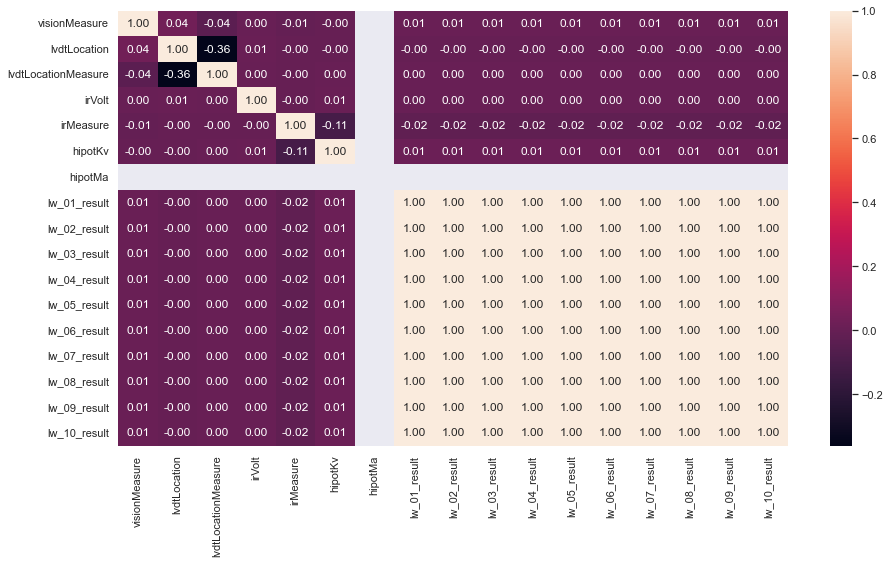

In [16]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(
    correlation,
    annot=True, 
    fmt='.2f'
)

# 5. 모델링(의사결정나무 - Decision Tree)

### 5-1. 독립변수 및 종속변수 설정

In [17]:
x1 = df.iloc[:, [-19]]
x2 = df.iloc[:, -16:] # 독립변수 설정
xPd = pd.concat([x1, x2], axis = 1)
x = xPd.values

y = df.iloc[:, -26:-25].values # 종속변수 설정
y = np.where(y == 'P', 1, 0)
y = y.ravel()

### 5-2. 데이터셋 분리(Train Set, Test Set)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 100000개 데이터 -> 0.3비율로 분리 (70000, 30000)

### 5-3. 종속변수 양품/불량품 비율 조정(SMOTE)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))

After OverSampling, counts of label '1': 69369
After OverSampling, counts of label '0': 69369


### 5-4. 모델링(의사결정나무 - Decision Tree)

In [20]:
df_clf = DecisionTreeClassifier(max_depth=3)
df_clf = df_clf.fit(x_train_over, y_train_over)
df_prediction = df_clf.predict(x_test)

In [21]:
feature_names = xPd.columns.tolist()
# tempList1 = feature_names[-9:-8]
# tempList2 = feature_names[-6:]
# feature_names = tempList1 + tempList2

target_name = np.array(['0','1'])

### 5-5. 모델링 시각화(의사결정나무 - Decision Tree)

In [22]:
os.environ['PATH'] += os.pathsep + "C:/Program Files/Graphviz/bin/"

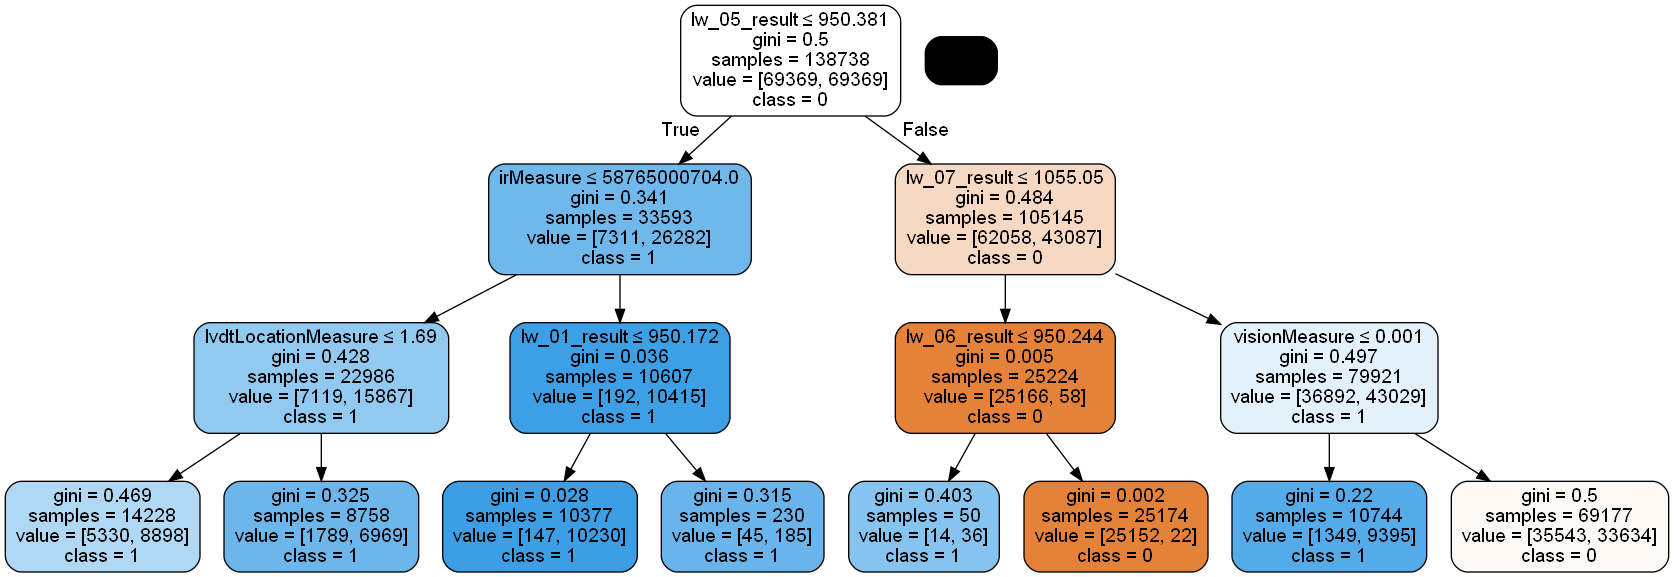

In [23]:
df_dot_data = tree.export_graphviz(df_clf,
                                   feature_names=feature_names,
                                   class_names=target_name,
                                   filled=True, rounded=True,
                                   special_characters=True)
df_graph = pydotplus.graph_from_dot_data(df_dot_data)
df_graph.write_png('./DecisionImage.png')
Image(df_graph.create_png())

In [24]:
from sklearn.tree import export_text

In [25]:
textResult = export_text(df_clf, feature_names=feature_names)
print(textResult)

|--- lw_05_result <= 950.38
|   |--- irMeasure <= 58765000704.00
|   |   |--- lvdtLocationMeasure <= 1.69
|   |   |   |--- class: 1
|   |   |--- lvdtLocationMeasure >  1.69
|   |   |   |--- class: 1
|   |--- irMeasure >  58765000704.00
|   |   |--- lw_01_result <= 950.17
|   |   |   |--- class: 1
|   |   |--- lw_01_result >  950.17
|   |   |   |--- class: 1
|--- lw_05_result >  950.38
|   |--- lw_07_result <= 1055.05
|   |   |--- lw_06_result <= 950.24
|   |   |   |--- class: 1
|   |   |--- lw_06_result >  950.24
|   |   |   |--- class: 0
|   |--- lw_07_result >  1055.05
|   |   |--- visionMeasure <= 0.00
|   |   |   |--- class: 1
|   |   |--- visionMeasure >  0.00
|   |   |   |--- class: 0



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [27]:
def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3: .4f}, AUC: {4: .4f}' .format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, df_prediction)

오차 행렬
[[  134   123]
 [14231 15512]]
정확도:  0.5215, 정밀도:  0.9921, 재현율:  0.5215, F1:  0.6837, AUC:  0.5215


###  ※ 과적합 방지를 위해 랜덤포레스트 모델링을 한 후 다시 예측 시도

# 6. 모델링(Random Forest)

### 6-1. Optimal 트리 갯수 찾기 

In [28]:
%matplotlib inline
import matplotlib
# matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

In [29]:
from sklearn.ensemble import RandomForestClassifier as RFC
algorithm = RFC
algorithm_name = 'rfc'

n_estimator_min = 1
n_estimator_max = 31

In [30]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree * 4 for n_tree in range(n_estimator_min, n_estimator_max)]
    
    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators=v_n_estimators, random_state=0)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [31]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
#     plt.savefig('../figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

    n_estimators  TrainScore  TestScore
0              4      0.9982     0.9744
1              8      0.9996     0.9873
2             12      0.9998     0.9892
3             16      0.9998     0.9902
4             20      0.9999     0.9905
5             24      0.9999     0.9908
6             28      0.9999     0.9908
7             32      0.9999     0.9910
8             36      1.0000     0.9910
9             40      1.0000     0.9911
10            44      1.0000     0.9911
11            48      1.0000     0.9912
12            52      1.0000     0.9912
13            56      1.0000     0.9911
14            60      1.0000     0.9911
15            64      1.0000     0.9912
16            68      1.0000     0.9912
17            72      1.0000     0.9912
18            76      1.0000     0.9912
19            80      1.0000     0.9912
20            84      1.0000     0.9912
21            88      1.0000     0.9911
22            92      1.0000     0.9911
23            96      1.0000     0.9911


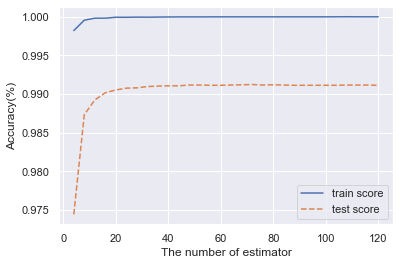

In [32]:
optimi_estimator(algorithm, algorithm_name, x_train_over, y_train_over, x_test, y_test, n_estimator_min, n_estimator_max)

##### Optimal 트리 64개 이상부터 TestScore 0.9912을 넘지 않으므로 64개 지정

### 6-2. Optimal 트리 적용

In [33]:
from sklearn.ensemble import RandomForestClassifier as RFC

clf = RFC(n_estimators=64, max_depth=3, random_state=0)
clf.fit(x_train_over,y_train_over)

predict1 = clf.predict(x_test)
# print('정확도 : {}' .format(accuracy_score(y_test,predict1)))
### 과적합 방지 후 정확도 92.9%

In [34]:
get_clf_eval(y_test, predict1)

오차 행렬
[[   31   226]
 [ 3274 26469]]
정확도:  0.8833, 정밀도:  0.9915, 재현율:  0.8899, F1:  0.9380, AUC:  0.5053


- 정확도 : 참과 거짓이 모두 올바르게 분류된 비율
- 정밀도(Precision) : 정상 또는 불량으로 예측한 것 중 실제 정상 또는 불량인 비율
- 재현율(Recall) : 실제 정상 또는 불량인 경우를 정확히 정상 또는 불량으로 분류한 비율
- f1-score : 정밀도와 재현율의 균형

### 6-3. 랜덤포레스트 결과 시각화

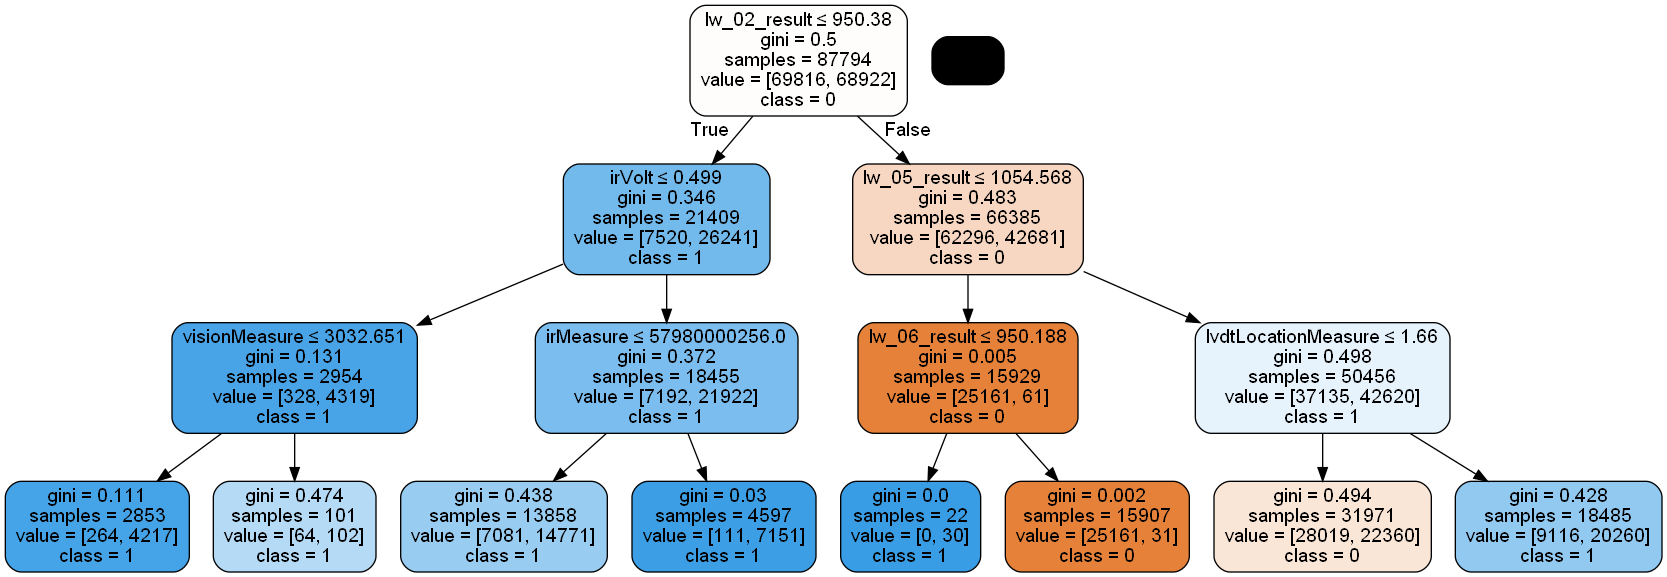

In [35]:
df_dot_rf_data = tree.export_graphviz(clf.estimators_[0],
                                   feature_names=feature_names,
                                   class_names=target_name,
                                   filled=True, rounded=True,
                                   special_characters=True)
df_rf_graph = pydotplus.graph_from_dot_data(df_dot_rf_data)
df_rf_graph.write_png('./RandomForestImage.png')
Image(df_rf_graph.create_png())

### 6-4. 랜덤포레스트 텍스트 시각화

In [36]:
randomforest_teest_result = export_text(
    clf.estimators_[0], 
    feature_names=feature_names
)
print(randomforest_teest_result)

|--- lw_02_result <= 950.38
|   |--- irVolt <= 0.50
|   |   |--- visionMeasure <= 3032.65
|   |   |   |--- class: 1.0
|   |   |--- visionMeasure >  3032.65
|   |   |   |--- class: 1.0
|   |--- irVolt >  0.50
|   |   |--- irMeasure <= 57980000256.00
|   |   |   |--- class: 1.0
|   |   |--- irMeasure >  57980000256.00
|   |   |   |--- class: 1.0
|--- lw_02_result >  950.38
|   |--- lw_05_result <= 1054.57
|   |   |--- lw_06_result <= 950.19
|   |   |   |--- class: 1.0
|   |   |--- lw_06_result >  950.19
|   |   |   |--- class: 0.0
|   |--- lw_05_result >  1054.57
|   |   |--- lvdtLocationMeasure <= 1.66
|   |   |   |--- class: 0.0
|   |   |--- lvdtLocationMeasure >  1.66
|   |   |   |--- class: 1.0



### 6-5. 랜덤포레스트 시각화(Heat Map)

,0,1
0,31,226
1,3274,26469


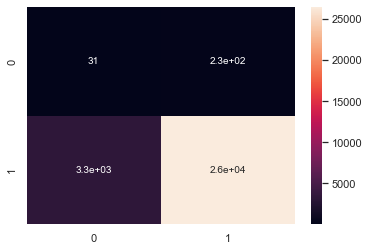

In [37]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predict1), columns=target_name, index=target_name)
sns.heatmap(cm, annot=True)
cm

# 7. 결론

### ※ 결론 및 해석

- 정확도 92.9%의 모델
- 데이터 중 실제 불량 수량= 20 + 237 = 257개
- 데이터 중 실제 양품 수량 = 1867 + 27876 = 29743개
- 모델이 예측한 불량 수량 = 20 + 1867 = 1887개
- 모델이 예측한 양품 수량 = 237 + 27876 = 28113개